# Matrix Factorization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns; sns.set_theme()

In [2]:
df = pd.read_csv("Matrix_Factorization_Assignment.csv") 
df.head()

,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


In [3]:
df_index = pd.read_csv("index_id.csv")
index_id =  int(df_index[df_index['Student Id'] == 170104030]['Index Id'])

In [64]:
index_id

331

In [4]:
def drop_row():
    N, M = df.shape
    l = []
    for i in range(N):
        if i % index_id == 0:
            l.append(i)
    df.drop(l, axis = 0, inplace = True)
    print(len(l), " row deleted")

def drop_col():
    N, M = df.shape
    l = []
    for i in range(M):
        if i % index_id == 0:
            l.append(str(i))
    df.drop(l, axis = 1, inplace = True)
    print(len(l), " column deleted")

def update_U(V,lambda_u,K,X):
    return X.dot(V).dot(np.linalg.inv((V.T).dot(V) + (lambda_u*np.eye(K))))

def update_V(U,lambda_v,K,X):
    return X.dot(U).dot(np.linalg.inv((U.T).dot(U) + (lambda_v*np.eye(K))))

def mse(X, pred):
    return (np.square(X - pred)).mean(axis=None)

def plot(loss_status, K):
    plt.plot(loss_status, label = 'K = ' + str(K))
    plt.legend()
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.show()
def write_result_to_file(i,K,loss):
    f = open("result1.txt", "a")
    res = "{} {} {}\n".format(i,K,loss)
    f.write(res)
    f.close()

In [5]:
drop_row()
drop_col()
X = df.drop(['Index'], axis = 1, inplace = True)

136  row deleted
16  column deleted


## Replace Nan

In [6]:
X = df.replace(np.nan, 1)
X = np.array(df, dtype = np.float32)
X = np.nan_to_num(X)

In [8]:
X.shape

(44864, 4984)

# Model

In [24]:
def train(k_list, n_iter):
    N,M = X.shape
    loss_list = []
    
    for K in k_list:
        loss_sum = 0.0
        np.random.seed(4)
        U = np.random.random((N,K))
        U = preprocessing.normalize(U)
        
        lambda_u = (0.00015 + 0.0001 * (index_id%8))
        lambda_v = (0.00025 - 0.0001 * (index_id%7))
        
        V = np.zeros((M, K))
        print('For k = ', K)
        
        for i in range(n_iter):
            V = update_V(U,lambda_v,K,X.T)
            U = update_U(V,lambda_u,K,X)
            pred = U.dot(V.T)
            loss = mse(X,pred)
            loss_sum = loss_sum + loss
            loss_list.append(loss)
            write_result_to_file(i,K,loss)
            print("\r>> Current Iteration {} ----- progress {}% ----- loss {}".format(i+1, format(((i+1)/n_iter)*100,".2f"), format(loss,".4f")), end='')
            
        print("\nAverage loss (for k={}) is {}".format(K, (loss_sum/n_iter)))
        plot(loss_list, K)
        
        with open('Matrix_U.npy', 'wb') as f:
            np.save(f, U)
        with open('Matrix_V.npy', 'wb') as f:
            np.save(f, V)
            
        loss_list.clear()

# Training Model

For k =  5
>> Current Iteration 150 ----- progress 100.00% ----- loss 11.9879
Average loss (for k=5) is 11.988183987737742


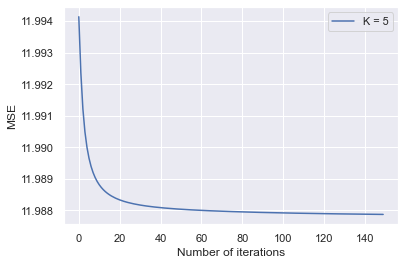

For k =  25
>> Current Iteration 150 ----- progress 100.00% ----- loss 11.9035
Average loss (for k=25) is 11.905137777557648


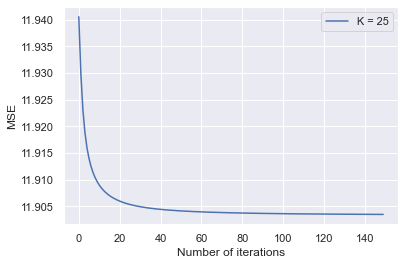

For k =  50
>> Current Iteration 150 ----- progress 100.00% ----- loss 11.7995
Average loss (for k=50) is 11.802556237447783


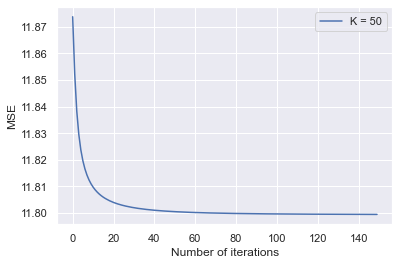

For k =  100
>> Current Iteration 150 ----- progress 100.00% ----- loss 11.5952
Average loss (for k=100) is 11.600614481311199


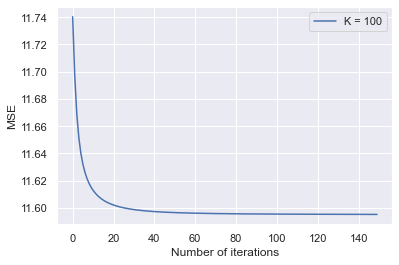

For k =  500
>> Current Iteration 150 ----- progress 100.00% ----- loss 10.0777
Average loss (for k=500) is 10.09442973079949


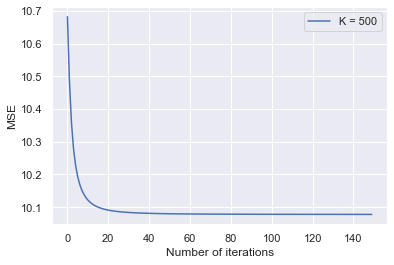

For k =  600
>> Current Iteration 150 ----- progress 100.00% ----- loss 9.7237
Average loss (for k=600) is 9.742277696610456


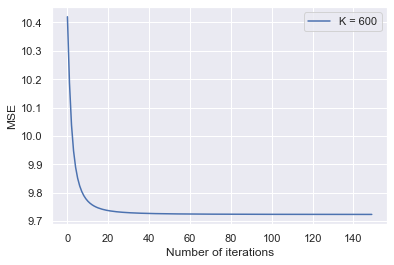

For k =  700
>> Current Iteration 150 ----- progress 100.00% ----- loss 9.3782
Average loss (for k=700) is 9.398329244599873


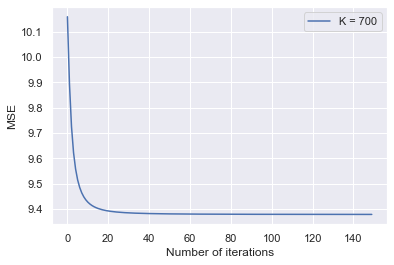

For k =  800
>> Current Iteration 150 ----- progress 100.00% ----- loss 9.0408
Average loss (for k=800) is 9.06231980980514


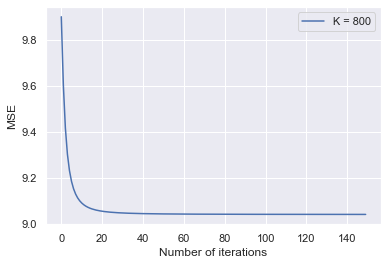

For k =  900
>> Current Iteration 150 ----- progress 100.00% ----- loss 8.7110
Average loss (for k=900) is 8.73366397484842


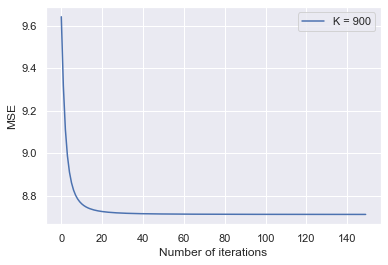

For k =  1000
>> Current Iteration 150 ----- progress 100.00% ----- loss 8.3887
Average loss (for k=1000) is 8.412394620638574


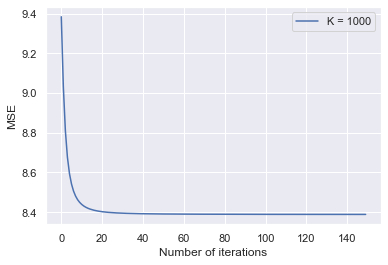

In [25]:
train([5,25,50,100,500,600,700,800,900,1000], 150)

# Cosine Similarity

In [39]:
with open('Matrix_U.npy', 'rb') as f:
    U = np.load(f)

with open('Matrix_V.npy', 'rb') as f:
    V = np.load(f)

In [40]:
cosine_similarity_of_U = cosine_similarity(U[1:20, 1:20])
cosine_similarity_of_V = cosine_similarity(V[1:20, 1:20])

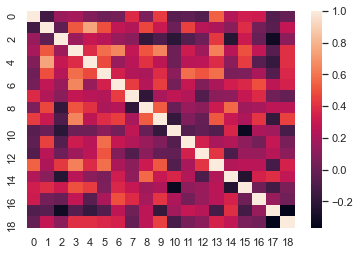

In [41]:
ax1 = sns.heatmap(cosine_similarity_of_U)

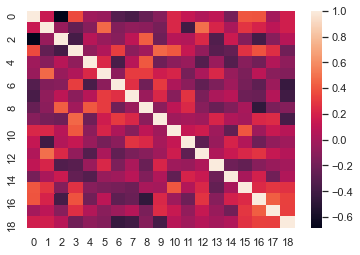

In [42]:
ax2 = sns.heatmap(cosine_similarity_of_V)